# Example 1 - Single Frequency Analysis

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, ACVoltageSource, Capacitor
from CircuitCalculator.SimpleCircuit.DiagramTranslator import circuit_translator
from CircuitCalculator.SimpleCircuit.DiagramSolution import single_frequency_solution
from CircuitCalculator.SimpleAnalysis.analyses import voltage_timeseries_plot, current_timeseries_plot, voltage_pointer_diagram, pq_diagram

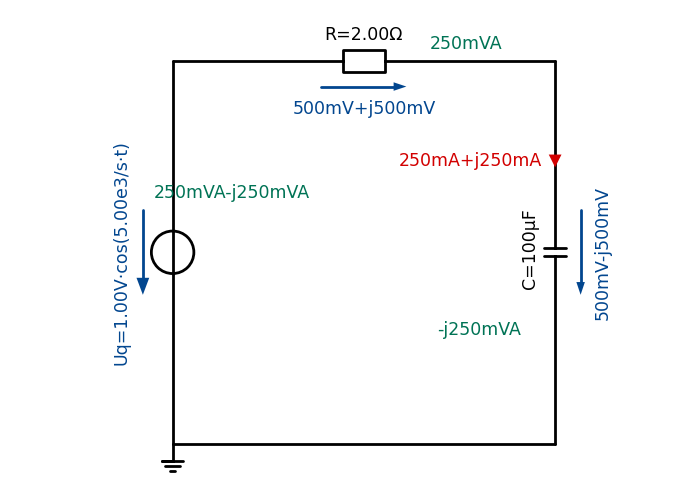

In [2]:
with Schematic(unit=9) as schematic:
    schematic += ACVoltageSource(V=1, w=5000, phi=0.0, name='Uq')
    schematic += Resistor(R=2, name='R').right()
    schematic += Capacitor(C=1e-4, name='C').down()
    schematic += Line().left()
    schematic += Ground()
    schematic_solution = single_frequency_solution(schematic=schematic, w=5000)
    schematic += schematic_solution.draw_voltage('R')
    schematic += schematic_solution.draw_voltage('C')
    schematic += schematic_solution.draw_current('C')
    schematic += schematic_solution.draw_power('R')
    schematic += schematic_solution.draw_power('Uq')
    schematic += schematic_solution.draw_power('C')

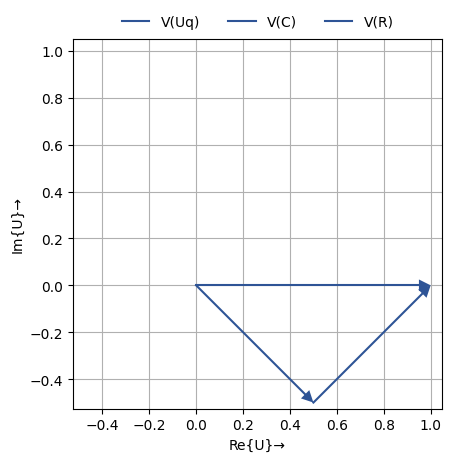

In [3]:
with voltage_pointer_diagram(circuit=circuit_translator(schematic), w=5000) as pointer_diagram:
    pointer_diagram.add_voltage_pointer('Uq')
    pointer_diagram.add_voltage_pointer('C')
    pointer_diagram.add_voltage_pointer('R', origin='C')

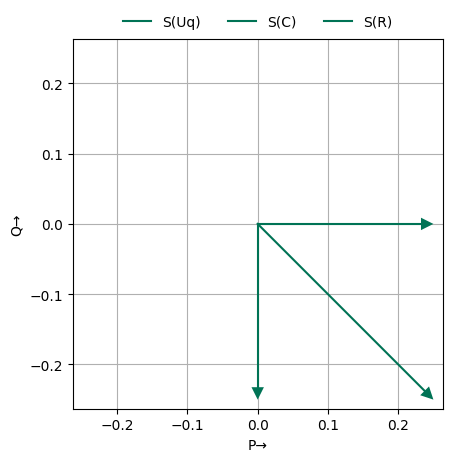

In [4]:
with pq_diagram(circuit=circuit_translator(schematic), w=5000) as pq:
    pq.add_power('Uq')
    pq.add_power('C')
    pq.add_power('R')

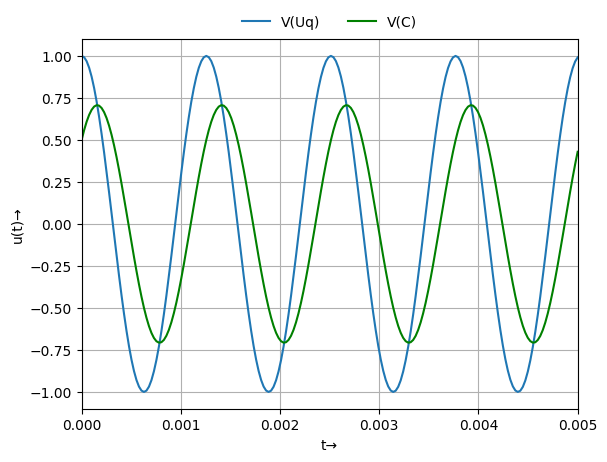

In [5]:
with voltage_timeseries_plot(circuit=circuit_translator(schematic), tmax=0.005) as plot:
    plot.add_voltage('Uq')
    plot.add_voltage('C', color='green')

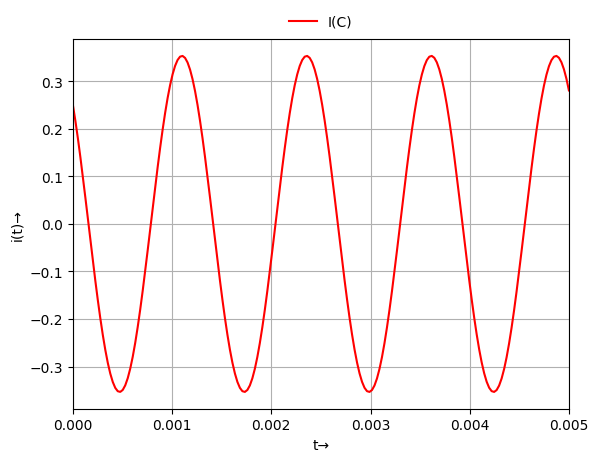

In [6]:
with current_timeseries_plot(circuit=circuit_translator(schematic), tmax=0.005) as plot:
    plot.add_current('C', color='red')